# K-Means Clustering In Python

Hi. This page is on K-Means Clustering in Python with a dataset on Labor Supply. The dataset can be retrived from the website link: https://vincentarelbundock.github.io/Rdatasets/datasets.html. The direct .csv file link is [here](https://vincentarelbundock.github.io/Rdatasets/csv/plm/LaborSupply.csv).





**References**

* https://python-graph-gallery.com/43-use-categorical-variable-to-color-scatterplot-seaborn/
* Wes McKinney's Book - Python For Data Analysis
* Dataset Link: https://vincentarelbundock.github.io/Rdatasets/csv/plm/LaborSupply.csv

A good website for loading in datasets is the last link from above. The datasets are from libraries in the R programming language. These datasets have URL links which can be loaded into Python with pandas' `read_csv()` function.

In the code below I insert some comments, load in some Python modules and have copied and pasted the documentation for the wages and hours dataset.

In [35]:
# Dataset: https://vincentarelbundock.github.io/Rdatasets/csv/plm/LaborSupply.csv
# Documentation Link: https://vincentarelbundock.github.io/Rdatasets/doc/plm/LaborSupply.html

# Documentation Part:

'''
Wages and Hours Worked
Description
A panel of 532 observations from 1979 to 1988

number of observations : 5320

Usage
data(LaborSupply)
Format
A data frame containing :

lnhr
log of annual hours worked

lnwg
log of hourly wage

kids
number of children

age
age

disab
bad health

id
id

year
year
'''

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Enable matplotlib in Jupyter Notebook
%matplotlib inline

The next lines of code involve reading in the dataset and previewing it with `.head()`, `.tail()` and `.describe()`.

In [36]:
# Load in dataset.
# Dataset Link: https://vincentarelbundock.github.io/Rdatasets/csv/plm/LaborSupply.csv

labor_data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/plm/LaborSupply.csv")

# Head of dataset:

labor_data.head(15)

,Unnamed: 0,lnhr,lnwg,kids,age,disab,id,year
0,1,7.58,1.91,2,27,0,1,1979
1,2,7.75,1.89,2,28,0,1,1980
2,3,7.65,1.91,2,29,0,1,1981
3,4,7.47,1.89,2,30,0,1,1982
4,5,7.50,1.94,2,31,0,1,1983
5,6,7.50,1.93,2,32,0,1,1984
6,7,7.56,2.12,2,33,0,1,1985
7,8,7.76,1.94,2,34,0,1,1986
8,9,7.86,1.99,2,35,0,1,1987
9,10,7.82,1.98,2,36,0,1,1988


In [37]:
# Tail of dataset:

labor_data.head(15)

,Unnamed: 0,lnhr,lnwg,kids,age,disab,id,year
0,1,7.58,1.91,2,27,0,1,1979
1,2,7.75,1.89,2,28,0,1,1980
2,3,7.65,1.91,2,29,0,1,1981
3,4,7.47,1.89,2,30,0,1,1982
4,5,7.50,1.94,2,31,0,1,1983
5,6,7.50,1.93,2,32,0,1,1984
6,7,7.56,2.12,2,33,0,1,1985
7,8,7.76,1.94,2,34,0,1,1986
8,9,7.86,1.99,2,35,0,1,1987
9,10,7.82,1.98,2,36,0,1,1988


In [38]:
# A look at the data with summary statistics using the .describe() method.

labor_data.describe()

,Unnamed: 0,lnhr,lnwg,kids,age,disab,id,year
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,2660.500000,7.657430,2.609436,1.555827,38.918233,0.060902,266.500000,1983.500000
std,1535.896047,0.285591,0.425892,1.195924,8.450351,0.239173,153.589336,2.872551
min,1.000000,2.770000,-0.260000,0.000000,22.000000,0.000000,1.000000,1979.000000
25%,1330.750000,7.580000,2.370000,1.000000,32.000000,0.000000,133.750000,1981.000000
50%,2660.500000,7.650000,2.640000,2.000000,38.000000,0.000000,266.500000,1983.500000
75%,3990.250000,7.780000,2.860000,2.000000,45.000000,0.000000,399.250000,1986.000000
max,5320.000000,8.560000,4.690000,6.000000,60.000000,1.000000,532.000000,1988.000000


Notice how there is the Unnamed: 0 and the id columns in the dataset. These two columns are not needed and can be removed with `.drop()`.

In [39]:
# Remove the Unnamed: 0 and id columns

labor_data = labor_data.drop(['Unnamed: 0', 'id'], axis = 1)

labor_data.head()



,lnhr,lnwg,kids,age,disab,year
0,7.58,1.91,2,27,0,1979
1,7.75,1.89,2,28,0,1980
2,7.65,1.91,2,29,0,1981
3,7.47,1.89,2,30,0,1982
4,7.50,1.94,2,31,0,1983


Columns in a dataset can be renamed with a list into the `.columns` attribute of the labor_data dataset.

In [40]:
# Rename columns:

labor_data.columns = ['Log_Hours', 'Log_Wages', 'Num_Kids', 'Age', 'Disabled', 'Year']

labor_data.head()



,Log_Hours,Log_Wages,Num_Kids,Age,Disabled,Year
0,7.58,1.91,2,27,0,1979
1,7.75,1.89,2,28,0,1980
2,7.65,1.91,2,29,0,1981
3,7.47,1.89,2,30,0,1982
4,7.50,1.94,2,31,0,1983


# An Initial Scatterplot : Log Hours Vs Log Wages

To have an idea of what the data looks like a scatterplot is a good place to start. This scatterplot looks at the relationship between the log of the number of hours versus the log of the wages.


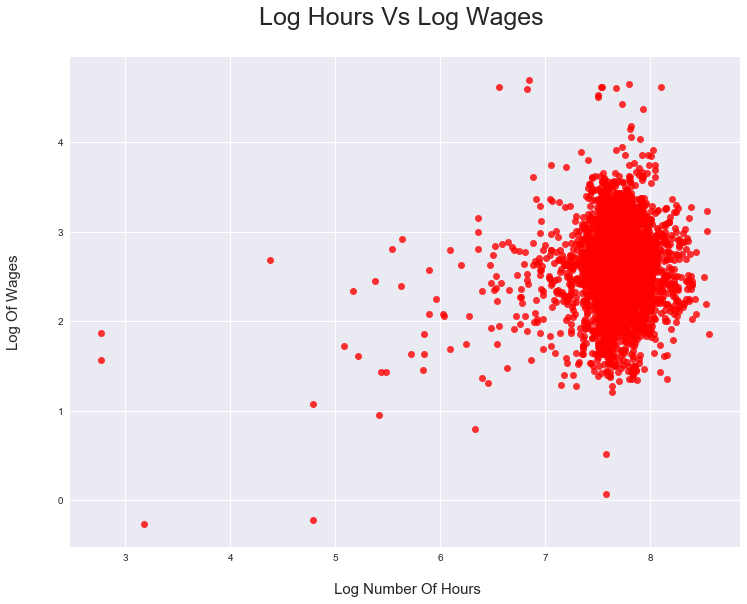

In [41]:
# Scatterplot Without regression fit:

plt.figure(figsize=(12, 9))# Resize plot
fig  = sns.regplot(x = 'Log_Hours', y = 'Log_Wages', data = labor_data, fit_reg = False, color = "red")

plt.xlabel("\n Log Number Of Hours", fontsize = 15)
plt.ylabel("Log Of Wages\n\n", fontsize = 15)
plt.title("Log Hours Vs Log Wages \n", fontsize = 25) 
plt.show(fig)

sns.plt.show()

The noticeable large chunk of points is located at around 8 for log number of hours and between 2 and 3 for the log of (hourly) wages.

The plot above did not have a regression line through the points as fit_reg was `False`. To include a regression line set the fit_reg argument to `True`.

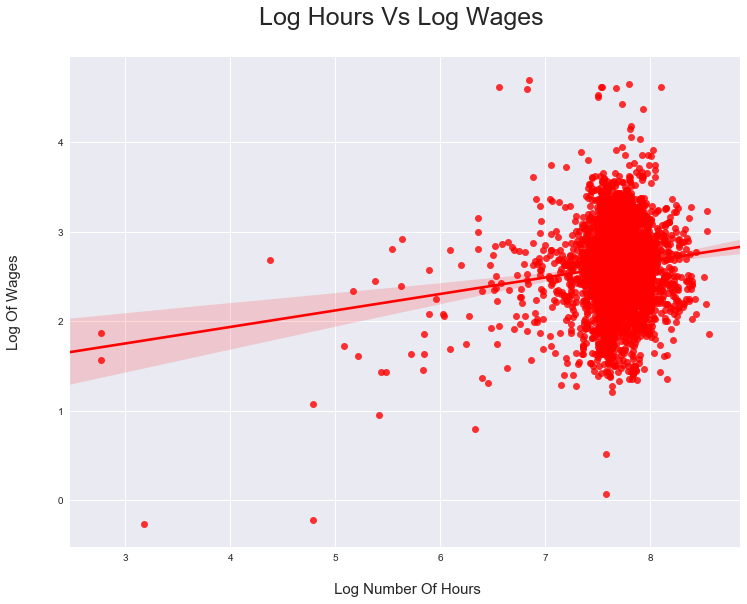

In [42]:
# Scatterplot With A Regression Line Fit:

plt.figure(figsize=(12, 9))# Resize plot
fig  = sns.regplot(x = 'Log_Hours', y = 'Log_Wages', data = labor_data, fit_reg = True, color = "red")

plt.xlabel("\n Log Number Of Hours", fontsize = 15)
plt.ylabel("Log Of Wages\n\n", fontsize = 15)
plt.title("Log Hours Vs Log Wages \n", fontsize = 25) 
plt.show(fig)

sns.plt.show()

## K-Means Clustering On The Labor Data Dataset

From the dataset we can assign clusters from the scatterplot of log number of hours versus log of hourly wages. The KMeans function is imported from sklearn.cluster. Also, the log hours and log wages columns are extracted from the labor data dataset.

In [43]:
from sklearn.cluster import KMeans

In [44]:
hours_wages = labor_data[['Log_Hours', 'Log_Wages']]

hours_wages.head(15)

,Log_Hours,Log_Wages
0,7.58,1.91
1,7.75,1.89
2,7.65,1.91
3,7.47,1.89
4,7.50,1.94
5,7.50,1.93
6,7.56,2.12
7,7.76,1.94
8,7.86,1.99
9,7.82,1.98


With a scree/elbow plot I want to determine an optimal amount of clusters to use for log hours and log wages. This is done with the use a for loop.

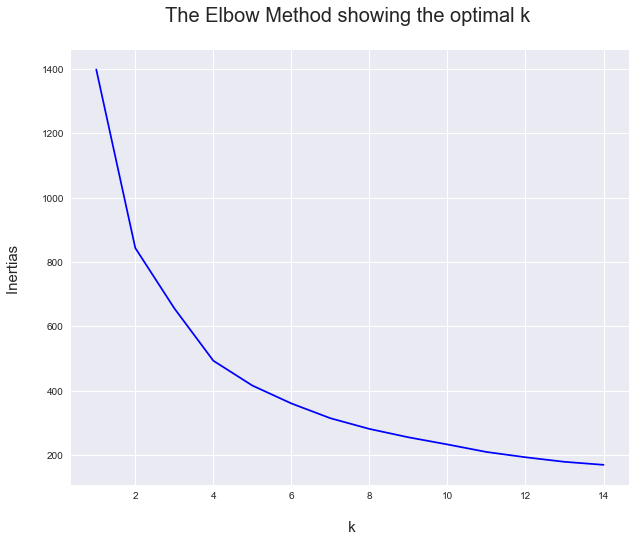

In [45]:
# References: https://pythonprogramminglanguage.com/kmeans-elbow-method/
# Datacamp Course: Unsupervised Learning With Python
# More clusters = less inertia

inertias = []
num_clusters = range(1,15)

for k in num_clusters:
    model = KMeans(n_clusters = k)
    kmeans_k = model.fit(hours_wages)
    inertias.append(model.inertia_)
    
# Elbow/Scree Plot

plt.figure(figsize=(10, 8))# Resize plot
plt.plot(num_clusters, inertias, 'bx-')
plt.xlabel('\n k', fontsize = 15)
plt.ylabel('Inertias \n', fontsize = 15)
plt.title('The Elbow Method showing the optimal k \n', fontsize = 20)
plt.show()

From the elbow plot above, a higher amount of clusters leads to lower inertia. It appears that around k = 8 the decreases get flatter and flatter. There is no clear cut "best" value for k. I am going to choose 8 clusters.


In [46]:
# K-Means model with the chosen 8 clusters:

kmeans_eightcl = KMeans(n_clusters = 8)

In [47]:
# Fit K-Means to hours_wages data:

kmeans_eight = kmeans_eightcl.fit(hours_wages)

kmeans_eight

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
# Take a look at the 8 cluster centers

cluster_eight = kmeans_eightcl.cluster_centers_

cluster_eight

array([[ 7.9968873 ,  2.60538462],
       [ 7.66860978,  2.95950144],
       [ 7.61600512,  2.64940461],
       [ 7.65232816,  1.8067184 ],
       [ 5.376     ,  1.71033333],
       [ 7.68495392,  3.38836406],
       [ 6.9809589 ,  2.47424658],
       [ 7.67647489,  2.28559817]])

In [49]:
# Obtaining cluster labels:

kmeans_eight_labels = kmeans_eightcl.predict(hours_wages)

kmeans_eight_labels

array([3, 3, 3, ..., 2, 2, 2])

In [50]:
# Add the cluster labels column into the hours_wages dataframe with the .insert() from pandas.

hours_wages.insert(loc = 2, column = "Cluster_Label", value = kmeans_eight_labels)


In [51]:
# Preview updated dataframe with head and tail methods.

hours_wages.head(10)


,Log_Hours,Log_Wages,Cluster_Label
0,7.58,1.91,3
1,7.75,1.89,3
2,7.65,1.91,3
3,7.47,1.89,3
4,7.50,1.94,3
5,7.50,1.93,3
6,7.56,2.12,7
7,7.76,1.94,3
8,7.86,1.99,3
9,7.82,1.98,3


In [52]:
hours_wages.tail(10)

,Log_Hours,Log_Wages,Cluster_Label
5310,7.89,2.57,0
5311,7.92,2.63,0
5312,7.80,2.59,2
5313,7.60,2.57,2
5314,7.58,2.51,2
5315,7.67,2.49,2
5316,7.67,2.52,2
5317,7.77,2.52,2
5318,7.67,2.53,2
5319,7.68,2.51,2


## Scatterplot With Eight Clusters

We can take a look at the scatterplot of log hours versus log wages but with the eight clusters now.

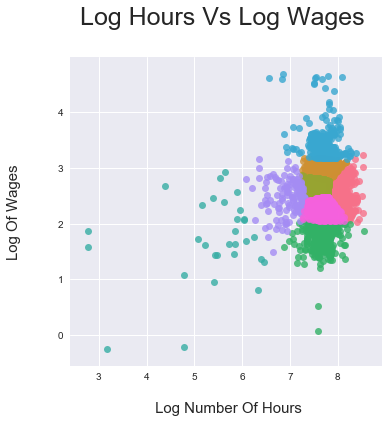

In [53]:
# Scatterplot Without regression fit With Eight Clusters

plt.figure(figsize=(15, 10))# Resize plot
fig  = sns.lmplot(x = 'Log_Hours', y = 'Log_Wages', hue = 'Cluster_Label', data = hours_wages, fit_reg=False, legend=False)

plt.xlabel("\n Log Number Of Hours", fontsize = 15)
plt.ylabel("Log Of Wages\n\n", fontsize = 15)
plt.title("Log Hours Vs Log Wages \n", fontsize = 25) 
plt.show(fig)

sns.plt.show()
